# Pre-processing, cleaning, and handling missing values in raw omics datasets

## Purpose:

Here, we will show the users how to clean their omnics dataset and what to extract from their raw datasets for downstream analysis.

We will demonstrate this with our own proteomics datasets. There will be two raw datasets to clean: we performed mass spectometry analysis on two different trials with different mutants and comparisons. 

* 1) cheA4 versus cheA1cheA4 versus WT (SP7)
* 2) cheA1 versus cheA1(pbbrTMX) versus WT (SP7)

First, we need to import the neccessary Python packages.

In [65]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

## Trial 1

Preprocessing is mininal in this trial because the data is already been cleaned. Ideally, we would want to see the **raw and normalized** protein abundances, the accession numbers, and the protein functions. 

In [49]:
# Raw dataset
data_trial1 = pd.read_excel('A4anddoublevssp7_rawmsdata.xlsx')
data_trial1.head()

,Unnamed: 0,Accession,# Unique Peptides,Gene function,Organism,GO_biologicalprocess,GO_cellularcomponent,GO_molecularfunction,protein_sequence,gene_uniprot_id,...,SV,"Abundances (Normalized): F7: Sample, Bio Rep1, SP7","Abundances (Normalized): F8: Sample, Bio Rep2, SP7","Abundances (Normalized): F9: Sample, Bio Rep3, SP7","Abundances (Normalized): F4: Sample, Bio Rep1, CheA4","Abundances (Normalized): F5: Sample, Bio Rep2, CheA4","Abundances (Normalized): F6: Sample, Bio Rep3, CheA4","Abundances (Normalized): F1: Sample, Bio Rep1, CheA1CheA4","Abundances (Normalized): F2: Sample, Bio Rep2, CheA1CheA4","Abundances (Normalized): F3: Sample, Bio Rep3, CheA1CheA4"
0,0,A0A0P0FBD5,3,Uncharacterized protein,Azospirillum brasilense,['nan'],['nan'],['nan'],MPRILLDYPGIKGESLIRNYKNLADCVSFDLSSGKREVGGFNYDDP...,AMK58_18760,...,1,4.199953e+08,5.327991e+08,1.449827e+08,6.119378e+07,1.042649e+08,1.139954e+08,2.483043e+07,2.529656e+07,3.566432e+07
1,1,A0A0P0F6W5,1,Uncharacterized protein,Azospirillum brasilense,"['amino acid transport [GO:0006865]', ' transm...",['integral component of membrane [GO:0016021]'],['nan'],MLSSLQPRSRPPLRWSHLTKKARFALILAAAMLVAVLVSLVVRAGF...,AMK58_14035,...,1,1.155383e+07,6.643362e+06,1.302690e+07,3.419722e+07,3.787835e+07,3.694340e+07,1.599574e+07,1.121537e+07,2.037844e+07
2,2,A0A0N7I7H6,16,Uncharacterized protein,Azospirillum brasilense,['nan'],['nan'],['nan'],MTAASFRVLAAALGVALLAGTAAPALAQATGKRTPLLIEGKTALHQ...,AMK58_03235,...,1,2.349336e+09,2.385109e+09,2.635075e+09,6.572775e+08,6.953822e+08,6.456934e+08,2.195988e+09,2.295658e+09,2.148146e+09
3,3,A0A0P0ENT2,2,Uncharacterized protein,Azospirillum brasilense,['nan'],['nan'],['nan'],MAKPNVEVLAVTDARKYTGKHLGAIRGGYGNALKTIEASGPVKDVV...,AMK58_11110,...,1,1.385459e+08,2.930326e+08,3.267244e+08,2.197483e+07,2.720034e+07,1.437205e+07,1.708144e+08,2.937530e+08,1.056491e+08
4,4,A0A0P0EGU7,4,Uncharacterized protein,Azospirillum brasilense,['nan'],['nan'],['nan'],MRKTLLSAAFAMAGGMALFSTPAAACNVEPYIGTICTYAFDWCPQG...,AMK58_05055,...,1,7.191629e+09,7.548888e+09,2.844535e+09,2.296458e+08,2.342704e+08,2.118544e+08,1.384437e+10,1.546637e+10,2.970876e+09


In [50]:
index = list(data_trial1.columns[12::])
index = ['Accession' , 'Gene function'] + index
data_trial1 = data_trial1[index]

The cleaned dataset for **trial 1** is shown below:

In [51]:
data_trial1.head()

,Accession,Gene function,"Abundances (Normalized): F7: Sample, Bio Rep1, SP7","Abundances (Normalized): F8: Sample, Bio Rep2, SP7","Abundances (Normalized): F9: Sample, Bio Rep3, SP7","Abundances (Normalized): F4: Sample, Bio Rep1, CheA4","Abundances (Normalized): F5: Sample, Bio Rep2, CheA4","Abundances (Normalized): F6: Sample, Bio Rep3, CheA4","Abundances (Normalized): F1: Sample, Bio Rep1, CheA1CheA4","Abundances (Normalized): F2: Sample, Bio Rep2, CheA1CheA4","Abundances (Normalized): F3: Sample, Bio Rep3, CheA1CheA4"
0,A0A0P0FBD5,Uncharacterized protein,4.199953e+08,5.327991e+08,1.449827e+08,6.119378e+07,1.042649e+08,1.139954e+08,2.483043e+07,2.529656e+07,3.566432e+07
1,A0A0P0F6W5,Uncharacterized protein,1.155383e+07,6.643362e+06,1.302690e+07,3.419722e+07,3.787835e+07,3.694340e+07,1.599574e+07,1.121537e+07,2.037844e+07
2,A0A0N7I7H6,Uncharacterized protein,2.349336e+09,2.385109e+09,2.635075e+09,6.572775e+08,6.953822e+08,6.456934e+08,2.195988e+09,2.295658e+09,2.148146e+09
3,A0A0P0ENT2,Uncharacterized protein,1.385459e+08,2.930326e+08,3.267244e+08,2.197483e+07,2.720034e+07,1.437205e+07,1.708144e+08,2.937530e+08,1.056491e+08
4,A0A0P0EGU7,Uncharacterized protein,7.191629e+09,7.548888e+09,2.844535e+09,2.296458e+08,2.342704e+08,2.118544e+08,1.384437e+10,1.546637e+10,2.970876e+09


## Trial 2 

This dataset is a bit different because the raw abundances were given as log2(abundances) and the protein IDs are merged together. Plus, protein functions are not given.

Note that there are missing datas, which we will have to take account later.

In [52]:
#Raw dataset
data_trial2 = pd.read_excel('proteomics_cheA1_cheA1delTMX_log2.xlsx')
data_trial2.head()

,ProteinID,CheA1_pBBR_TMX_Rep01,CheA1_pBBR_TMX_Rep02,CheA1_pBBR_TMX_Rep03,CheA1_Rep01,CheA1_Rep02,CheA1_Rep03,sp7_Rep01,sp7_Rep02,sp7_Rep03
0,tr|A0A060D8U1|A0A060D8U1_AZOBR,27.678230,28.351285,28.118906,27.011518,27.564398,28.045627,27.414860,27.214066,27.412692
1,tr|A0A060D8W4|A0A060D8W4_AZOBR,29.920970,28.593295,30.462980,30.902809,30.582126,30.702943,30.896710,30.706459,31.226559
2,tr|A0A060D963|A0A060D963_AZOBR,NaN,NaN,25.877677,26.736126,25.643531,26.893250,NaN,NaN,26.609046
3,tr|A0A060D9F9|A0A060D9F9_AZOBR,28.021528,26.481954,26.949522,26.466264,28.467305,25.593041,27.428749,27.791901,27.853953
4,tr|A0A060D9G4|A0A060D9G4_AZOBR,NaN,NaN,NaN,NaN,NaN,24.893680,NaN,NaN,NaN


In [53]:
# Separating the accessions numbers out of the protein IDs and adding that to the dataframe
# Note: try to rerun all of the cells if error comes up.

names = []
for i in list(data_trial2['ProteinID']):
    hi = re.split('\|', i)
    names.append(hi[1])
data_trial2['Accession'] = names
columns = list(data_trial2.columns)
data_trial2 = data_trial2[columns[1:len(columns)]]
data_trial2.head()

,CheA1_pBBR_TMX_Rep01,CheA1_pBBR_TMX_Rep02,CheA1_pBBR_TMX_Rep03,CheA1_Rep01,CheA1_Rep02,CheA1_Rep03,sp7_Rep01,sp7_Rep02,sp7_Rep03,Accession
0,27.678230,28.351285,28.118906,27.011518,27.564398,28.045627,27.414860,27.214066,27.412692,A0A060D8U1
1,29.920970,28.593295,30.462980,30.902809,30.582126,30.702943,30.896710,30.706459,31.226559,A0A060D8W4
2,NaN,NaN,25.877677,26.736126,25.643531,26.893250,NaN,NaN,26.609046,A0A060D963
3,28.021528,26.481954,26.949522,26.466264,28.467305,25.593041,27.428749,27.791901,27.853953,A0A060D9F9
4,NaN,NaN,NaN,NaN,NaN,24.893680,NaN,NaN,NaN,A0A060D9G4


## Determing the protein functions using UniPROT: 

Now that we have the separated accession numbers, we need copy the accession number (shown below) list into:

> https://www.uniprot.org/uploadlists/

Then, you would need to download the excel file from the UniPROT website, which **will contain a list of corresponding protein functions based on the accession IDs**.

You need to run this code below and copy all of the accessions numbers. 

In [60]:
for i in data_trial2['Accession']:
    print(i)

Now, we have to extract the protein functions from excel file from downloaded from UniPROT and add them into the main dataframe

In [55]:
protein_functions = pd.read_excel('name.xlsx')
data_trial2['Gene function'] = protein_functions['Protein names']
data_trial2.head()

,CheA1_pBBR_TMX_Rep01,CheA1_pBBR_TMX_Rep02,CheA1_pBBR_TMX_Rep03,CheA1_Rep01,CheA1_Rep02,CheA1_Rep03,sp7_Rep01,sp7_Rep02,sp7_Rep03,Accession,Gene function
0,27.678230,28.351285,28.118906,27.011518,27.564398,28.045627,27.414860,27.214066,27.412692,A0A060D8U1,Cold-shock protein (Putative cold-shock DNA-bi...
1,29.920970,28.593295,30.462980,30.902809,30.582126,30.702943,30.896710,30.706459,31.226559,A0A060D8W4,50S ribosomal protein L35
2,NaN,NaN,25.877677,26.736126,25.643531,26.893250,NaN,NaN,26.609046,A0A060D963,Glutaredoxin
3,28.021528,26.481954,26.949522,26.466264,28.467305,25.593041,27.428749,27.791901,27.853953,A0A060D9F9,Chemotaxis protein CheY (DNA-binding response ...
4,NaN,NaN,NaN,NaN,NaN,24.893680,NaN,NaN,NaN,A0A060D9G4,General stress protein 26 (Pyridoxamine 5'-pho...


## Handling missing data

We decided to perform listwise deletion to remove any proteins that have missing values. Though there are problems associated with listwise deletion, we reasoned that this method will not bias our analysis if we assume that  the values are missing at random. To decide what deletions or imputation methods are suitable for your analysis and questions, refer to:

> https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4

In [56]:
#Drop rows (or proteinID) with missing values

data_trial2 = data_trial2.dropna()
data_trial2 = data_trial2.reset_index(drop=True)
columns = list(data_trial2.columns)
data_trial2 = data_trial2[columns[0:len(data_trial2.columns)]]

The cleaned dataset for **trial 2** is shown below:

In [57]:
data_trial2.head()

,CheA1_pBBR_TMX_Rep01,CheA1_pBBR_TMX_Rep02,CheA1_pBBR_TMX_Rep03,CheA1_Rep01,CheA1_Rep02,CheA1_Rep03,sp7_Rep01,sp7_Rep02,sp7_Rep03,Accession,Gene function
0,27.678230,28.351285,28.118906,27.011518,27.564398,28.045627,27.414860,27.214066,27.412692,A0A060D8U1,Cold-shock protein (Putative cold-shock DNA-bi...
1,29.920970,28.593295,30.462980,30.902809,30.582126,30.702943,30.896710,30.706459,31.226559,A0A060D8W4,50S ribosomal protein L35
2,28.021528,26.481954,26.949522,26.466264,28.467305,25.593041,27.428749,27.791901,27.853953,A0A060D9F9,Chemotaxis protein CheY (DNA-binding response ...
3,28.515878,27.860462,27.642605,26.758032,26.813398,28.224904,28.262294,26.007408,28.672895,A0A060D9K4,LysR family transcriptional regulator
4,28.257412,28.057875,28.354392,28.512585,28.649630,28.435946,27.901150,27.756669,28.366099,A0A060D9N9,Nucleoid-associated protein ABAZ39_01980


# Quality check of omics datasets

Checking the quality of your omnic datasets is **crucial** because it ensures that your downstream analysis are not biased due to the experimental and/or technical errors of the mass spectometry analysis. In addition, checking the dataset's quality also gives you information about how **reproducible** the abundance's profiles are for each replicates of your experimental conditions. 

There are two criterias we would need to confirm before continuing with downstream analysis:
* Abundance profiles under multiple replicates and conditions must be normalized-.
* There have to be reasonable correlations of abundance profiles between replicates.

For more information, please refer to:
* https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2818771/
* https://www.mcponline.org/content/8/10/2227

**Note**: Our collaborators already normalized that raw datasets. But for demonstration purposes, we will shows what the normalized datasets looks like. 

Text(0.5, 1.0, 'Trial 2')

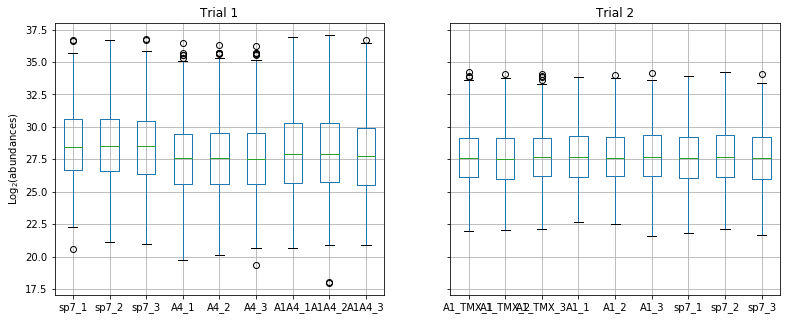

In [64]:
columns = ['sp7_1', 'sp7_2', 'sp7_3', 'A4_1', 'A4_2','A4_3','A1A4_1','A1A4_2','A1A4_3']
dummy = data_trial1[data_trial1.columns[2:11]]
dummy= np.log2(dummy)
dummy.columns = columns

fig, axes = plt.subplots(1,2,sharex=False,sharey=True, figsize = (13,5))
dummy.boxplot(ax = axes[0])
axes[0].set_ylabel('Log$_2$(abundances)')
axes[0].set_title('Trial 1')

columns = ['A1_TMX_1', 'A1_TMX_2', 'A1_TMX_3', 'A1_1', 'A1_2','A1_3','sp7_1','sp7_2','sp7_3']
dummy = data_trial2[data_trial2.columns[0:9]]
dummy.columns = columns
dummy.boxplot(ax = axes[1])
axes[1].set_title('Trial 2')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


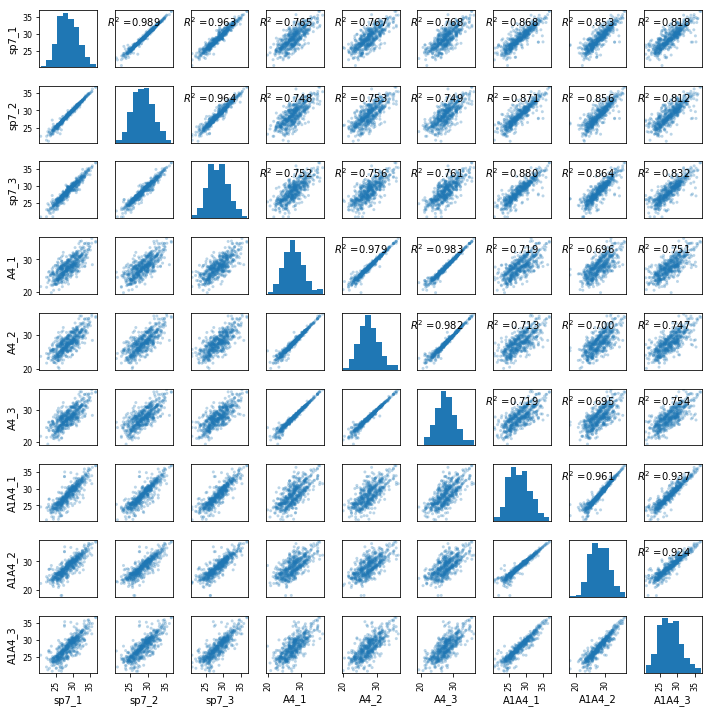

In [66]:
#Scatterplot with Pearson's correlation: Trial 1
columns = ['sp7_1', 'sp7_2', 'sp7_3', 'A4_1', 'A4_2','A4_3','A1A4_1','A1A4_2','A1A4_3']
dummy = data_trial1[data_trial1.columns[2:11]]
dummy= np.log2(dummy)
dummy.columns = columns

fig, ax = plt.subplots(1,1,  tight_layout = True, figsize = (10,10))
axes = scatter_matrix(dummy, ax=ax, alpha=0.3)
corr = dummy.corr().as_matrix()
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate( '$R^2$ ='+ "%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='right', va='center')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


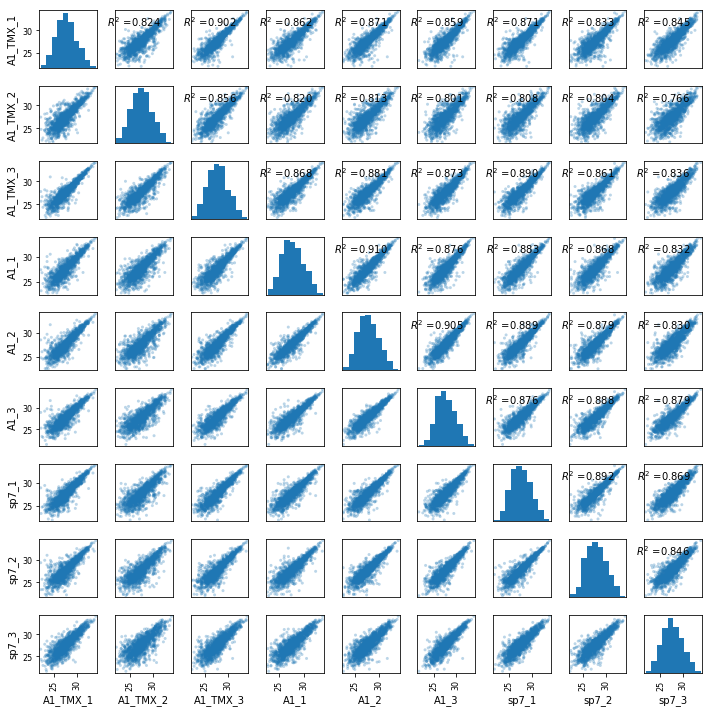

In [67]:
#Scatterplot with Pearson's correlation: Trial 2
columns = ['A1_TMX_1', 'A1_TMX_2', 'A1_TMX_3', 'A1_1', 'A1_2','A1_3','sp7_1','sp7_2','sp7_3']
dummy = data_trial2[data_trial2.columns[0:9]]
dummy.columns = columns

fig, ax = plt.subplots(1,1,  tight_layout = True, figsize = (10,10))
axes = scatter_matrix(dummy, ax=ax, alpha=0.3)
corr = dummy.corr().as_matrix()
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate( '$R^2$ ='+ "%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='right', va='center')
plt.show()